In [11]:
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os,sys
import pandas as pd
import geocat.datafiles as gdf
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil
import regionmask


In [12]:
fn_temp = 'TS_cmems_reanalysis_sea_surface_temperature_from1987to2019_AdriaticSea.nc'

nut_nc=[os.path.join(fn_temp) for f in fn_temp]

nut_ds=[xr.open_dataset(nc) for nc in nut_nc]
j=0

# Extract a slice of the data

t = nut_ds[j].isel(time=290).sel(lat=slice(37, 46), lon=slice(12, 22))


In [13]:
t

<xarray.Dataset>
Dimensions:  (lat: 216, lon: 241)
Coordinates:
    time     datetime64[ns] 1987-10-18T12:00:00
    depth    float32 ...
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.8

In [14]:
#file_csv_area_1= pd.read_csv('area111.csv')
file_csv_area_1= pd.read_csv('area222.csv')
#file_csv_area_1= pd.read_csv('area333.csv')
#file_csv_area_1= pd.read_csv('area444.csv')


In [15]:
lon_name   = t.lon[:]
lat_name   = t.lat[:]
time_name  = 'year'
depth_name = 'depth'
temp       = t.thetao[:]

In [16]:
outline_1 = np.array(file_csv_area_1)

region_area_1 = regionmask.Regions([outline_1])



In [17]:
mask_pygeos_area_1 = region_area_1.mask(t.thetao, method="pygeos")
LON, LAT = np.meshgrid(lon_name, lat_name)



In [18]:
thetao_area_1 = t.thetao.values
thetao_area_1[np.isnan(mask_pygeos_area_1)] = np.nan



In [19]:
thetao_area_1


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

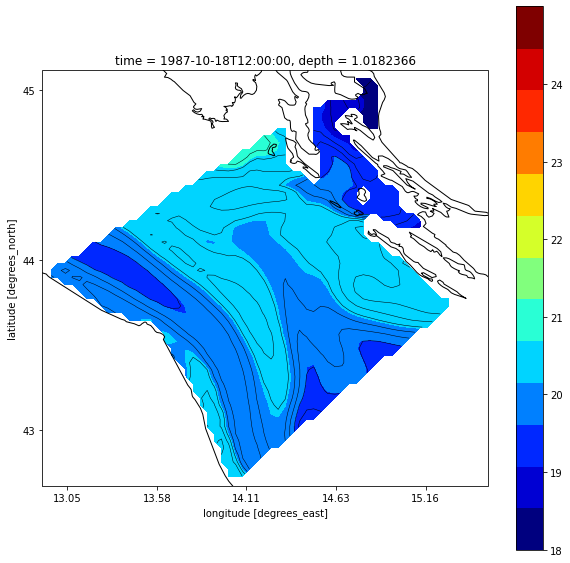

In [20]:
fig = plt.figure(figsize=(10, 10))

#  coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=1,alpha=0.9999)




# Import an NCL colormap
newcmp = gvcmaps.NCV_jet

# Contourf-plot data: external contour
heatmap = t.thetao.plot.contourf(ax=ax,
                          transform=projection,
                          levels=14,
                          vmin=18,
                          vmax=25,
                          cmap=newcmp,
                          add_colorbar=False)

lines=t.thetao.plot.contour(ax=ax,alpha=1,linewidths=0.5,colors = 'k',linestyles='None',levels=14)
gvutil.set_axes_limits_and_ticks(ax,
                                 xlim=(12, 22),
                                 ylim=(37, 46),
                                 xticks=np.linspace(12, 22, 20),
                                 yticks=np.linspace(37, 46, 10))

cbar = plt.colorbar(heatmap, ticks=np.arange(18, 25, 1))


#ax.set_extent([12.1458333333333321, 14.8124999999999982, 43.9583340312159336, 45.7916678850040881])
ax.set_extent([12.9030545454545, 15.5260363636364, 42.67, 45.1154181818182])
#ax.set_extent([14.0166636363636, 17.1778454545455, 41.9038828181818, 43.8950363636364])
#ax.set_extent([15.8904181818182, 19.9877818181818, 39.6991617292197, 43.1738818181818])

#plt.savefig('all_A4AdriaticSea.png')
